## Importing LIBRARIES

In [17]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Dataset

In [18]:
#importing the dataset
matches= pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [20]:
#1st dataset
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
matches.shape

(756, 18)

In [23]:
deliveries.shape

(179078, 21)

In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [25]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [26]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [27]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Merging datasets

In [28]:
#merging the 2 datasets
df = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [29]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Data VISUALIZATION

Text(0, 0.5, 'Number of matches')

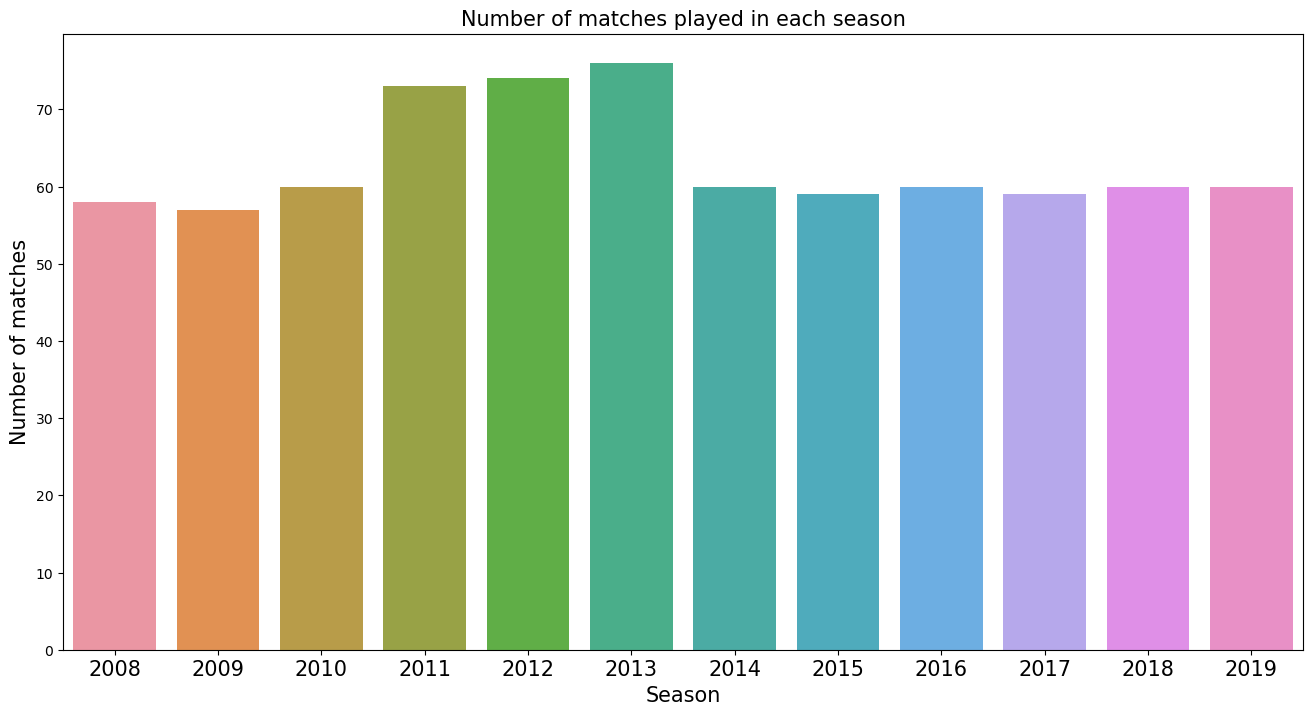

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x='season', data=matches)
plt.title('Number of matches played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.ylabel('Number of matches', fontsize=15)

Text(0, 0.5, 'Number of Team')

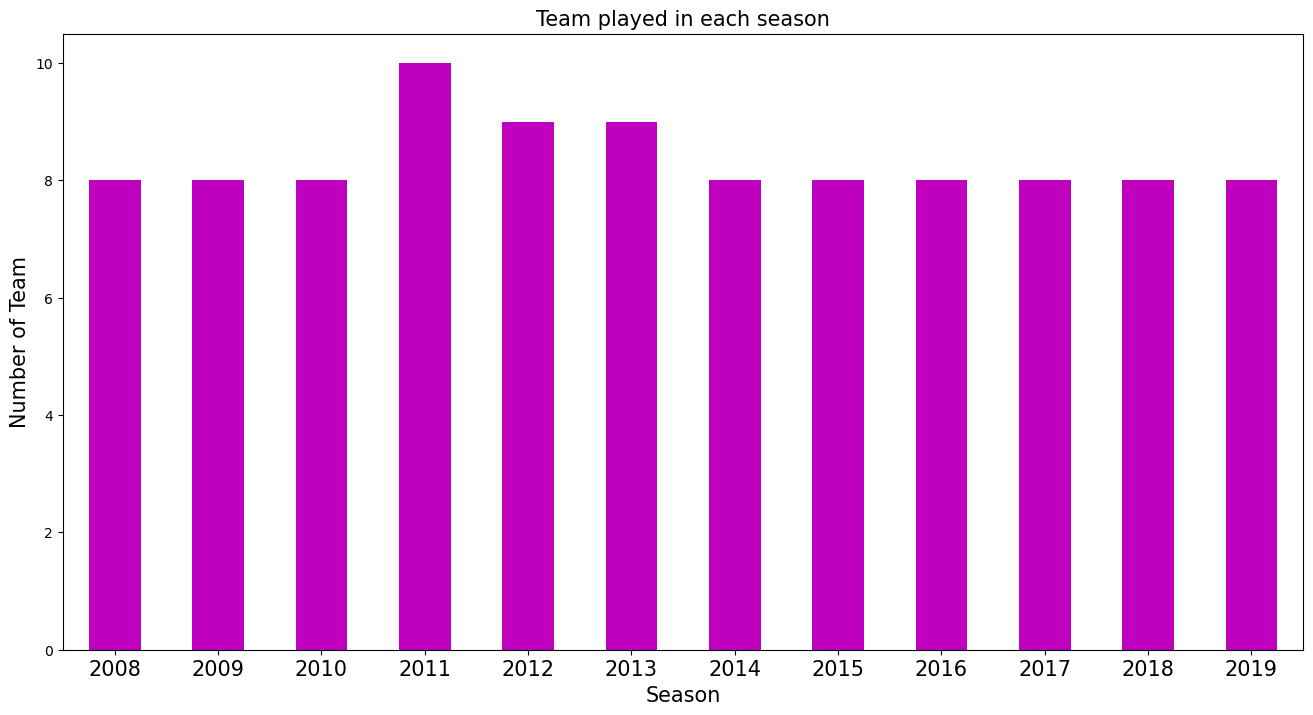

In [30]:
# TEAMS PLAYED IN EACH SEASON
plt.figure(figsize=(16,8))
matches.groupby('season')['team1'].nunique().plot(kind='bar', color='m')
plt.title('Team played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.ylabel('Number of Team', fontsize=15)

Text(0, 0.5, 'Number of matches')

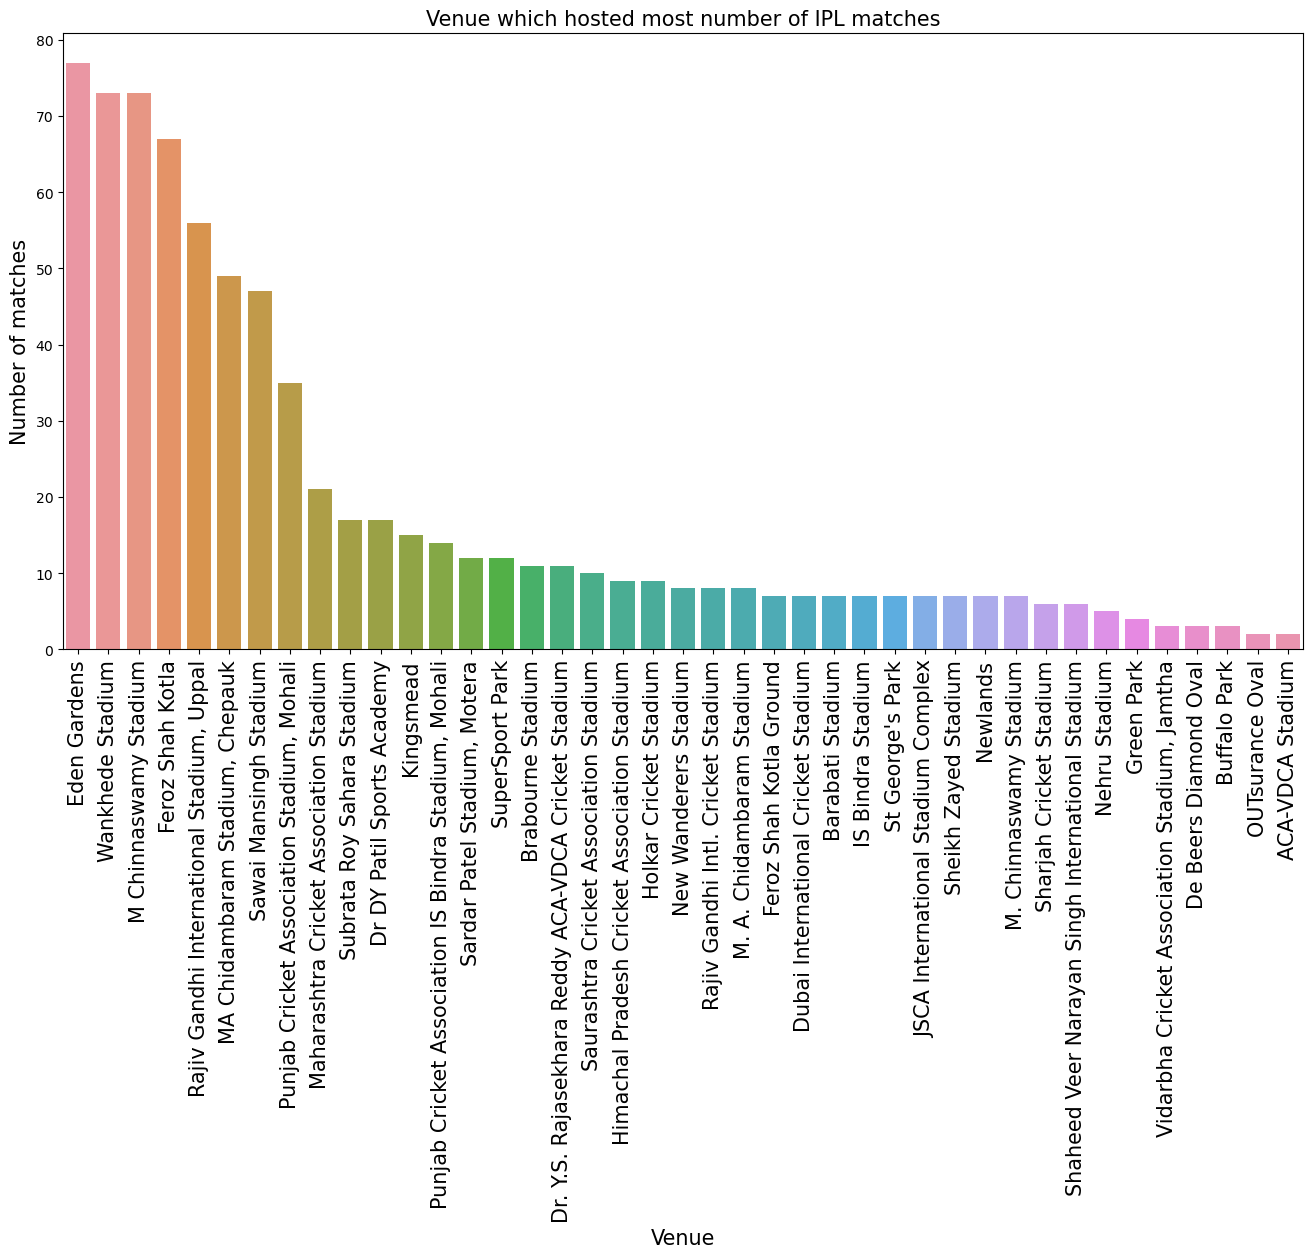

In [15]:
# VENUE WHERE MOST MATCHES OCCURED
plt.figure(figsize=(16,8))
sns.countplot(x='venue',data=matches ,order=df['venue'].value_counts().index)
plt.title('Venue which hosted most number of IPL matches', fontsize=15)
plt.xlabel('Venue', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Number of matches', fontsize=15)

In [32]:
# MOST WINNING TEAM
winning_teams = matches[['season','winner']]
winner_team ={}
for i in sorted(winning_teams.season.unique()):
    winner_team[i] = winning_teams[winning_teams.season ==i]['winner'].tail(1).values[0]
    
winner_IPL = pd.Series(winner_team)
winner_IPL = pd.DataFrame(winner_IPL, columns=['Yearly Winning Team'])
winner_IPL

,Yearly Winning Team
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


Text(0, 0.5, 'Number of seasons')

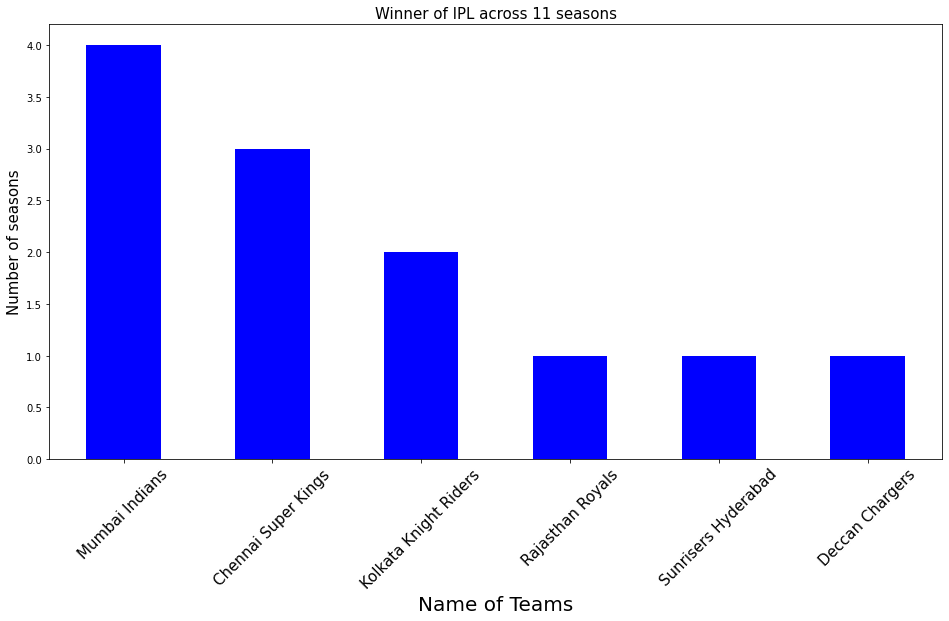

In [17]:
# Outstanding team which has won most of the IPL Matches
plt.figure(figsize=(16,8))
winner_IPL['winner team'].value_counts().plot(kind='bar', color='b')
plt.title('Winner of IPL across 11 seasons', fontsize=15)
plt.xlabel('Name of Teams', fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylabel('Number of seasons', fontsize=15)

Text(0.5, 1.0, 'Decision taken by captain after winning toss')

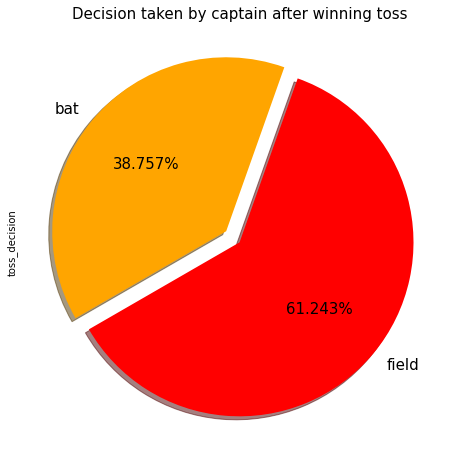

In [18]:
#TOSS DECISION
plt.figure(figsize=(16,8))
(matches['toss_decision'].value_counts()).plot(kind='pie',startangle=210,autopct = '%2.3f%%',shadow=4,explode=(0,0.1),colors=['r','orange'], fontsize=15)
plt.title('Decision taken by captain after winning toss', fontsize=15)

Text(0, 0.5, 'Frequency')

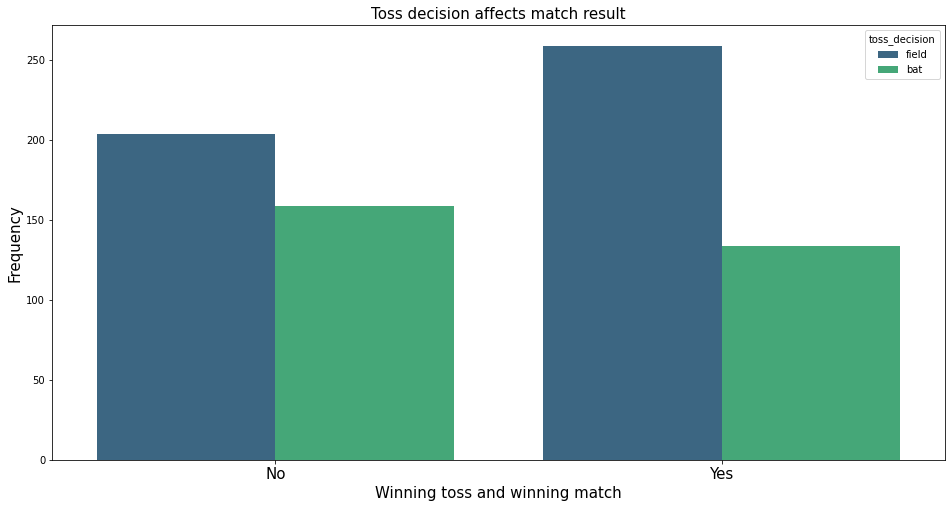

In [19]:
#TOSS DECISION AFFECTS WINING?
matches['tosswin_matchwin'] = np.where((matches.toss_winner == matches.winner), 'Yes','No')

plt.figure(figsize=(16,8))
sns.countplot(x='tosswin_matchwin',data = matches, hue='toss_decision', palette='viridis')
plt.title('Toss decision affects match result', fontsize=15)
plt.xlabel('Winning toss and winning match', fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Frequency')

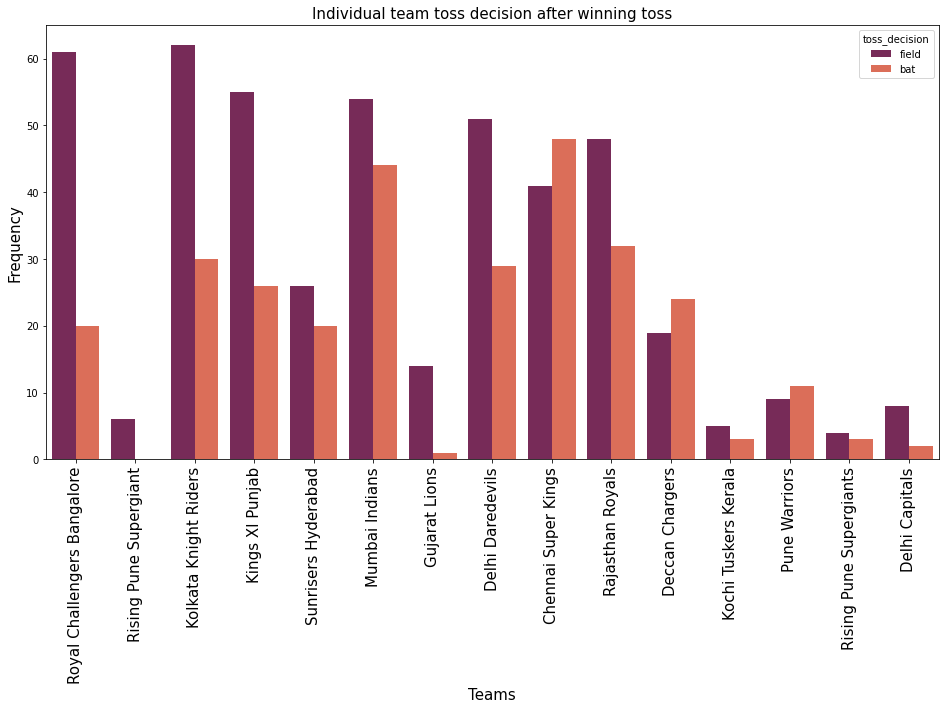

In [20]:
#INDIVIDUAL TEAM TOSS DECISION AFTER WINING TOSS
plt.figure(figsize=(16,8))
sns.countplot(x='toss_winner',data = matches, hue='toss_decision', palette='rocket',)
plt.title('Individual team toss decision after winning toss', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Frequency')

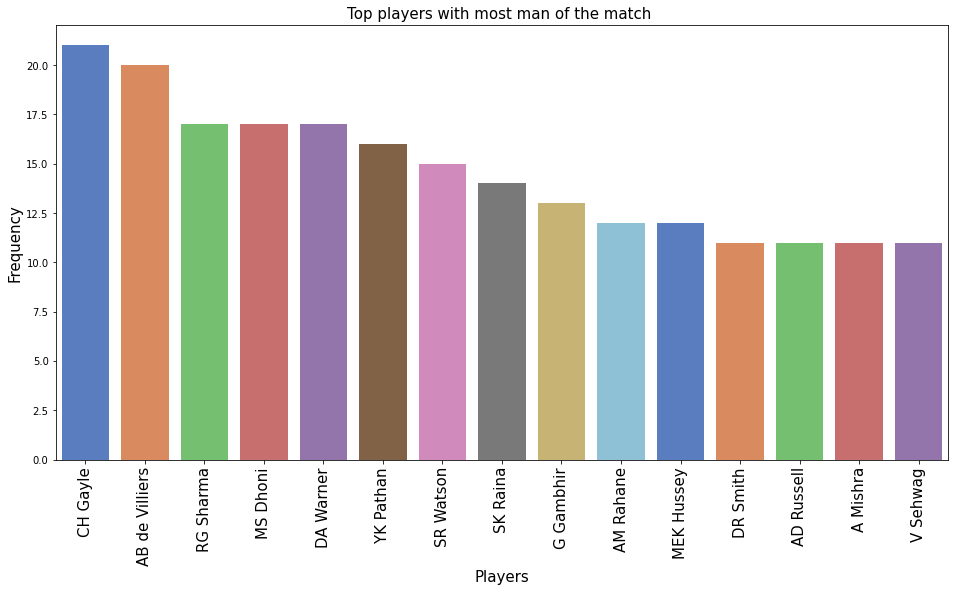

In [21]:
# TOP PLAYERS WITH MOST MAN OF THE MATCH
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data = matches,order=df['player_of_match'].value_counts().head(15).index , palette='muted')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Text(0, 0.5, 'Total runs scored')

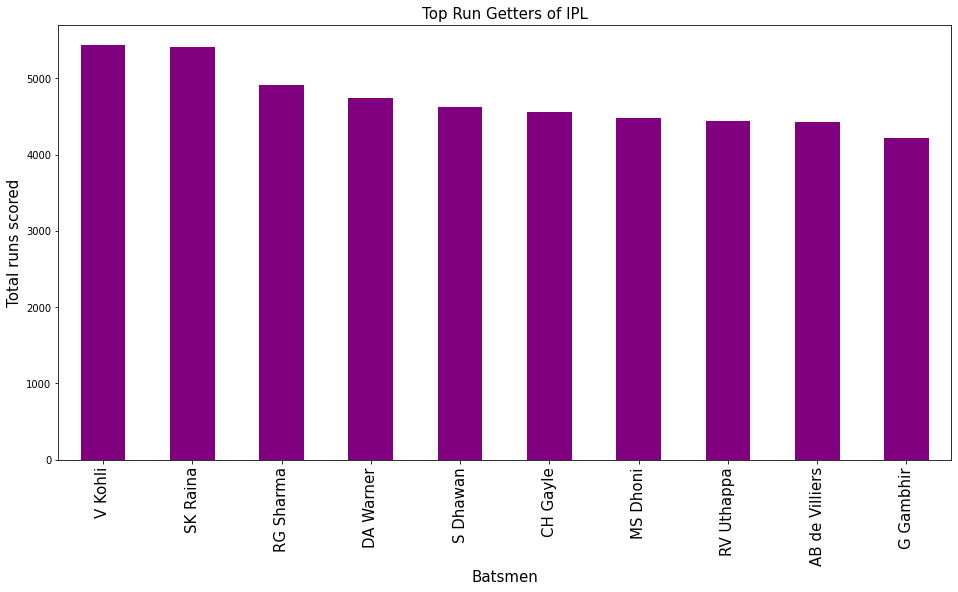

In [22]:
# TOP RUN SCORERS OF IPL
#using merged dataset (mathces and deliveries)
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8), color='purple')
plt.title('Top Run Getters of IPL', fontsize=15)
plt.xlabel('Batsmen', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Total runs scored', fontsize=15)

<Axes: >

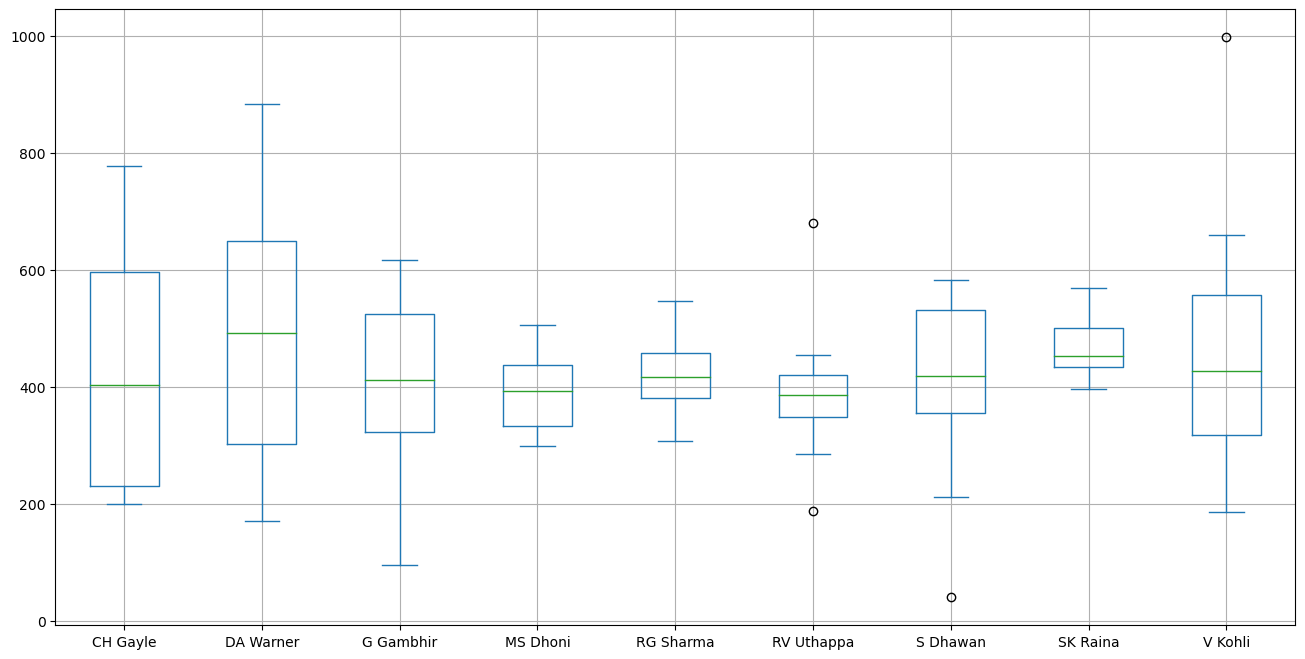

In [16]:
# MOST CONSISTENT BATSMAN OF IPL
cons_batsman = df[df.batsman.isin(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan','CH Gayle','MS Dhoni',
                                         'RV Uthappa', 'AB de Villers', 'G Gambhir'])]
[['batsman', 'season', 'total_runs']]

cons_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box', figsize=(16,8), grid='-')


Text(0, 0.5, 'Total Wicket Taken')

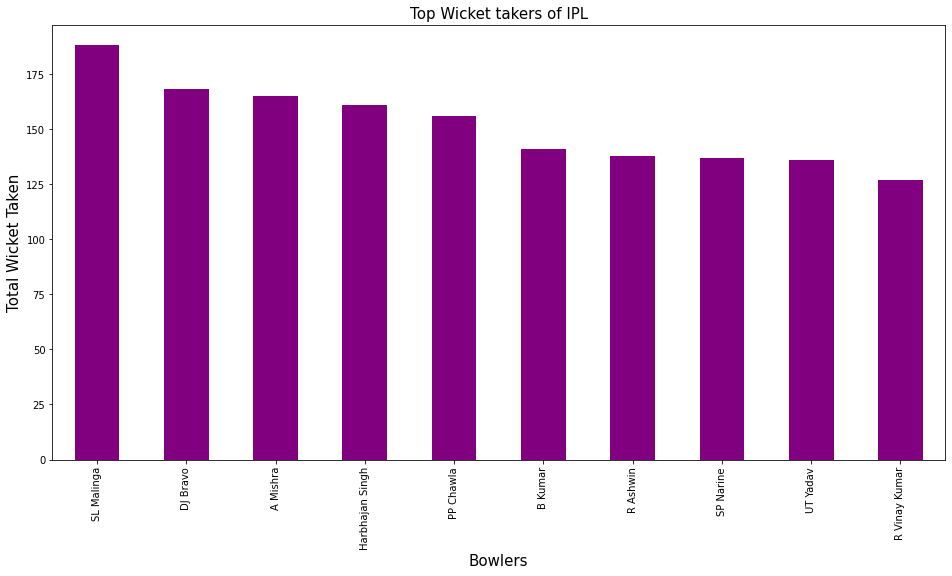

In [24]:
# TOP WICKET TAKERS OF IPL
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(16,8), color='purple')
plt.title('Top Wicket takers of IPL', fontsize=15)
plt.xlabel('Bowlers', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Wicket Taken', fontsize=15)

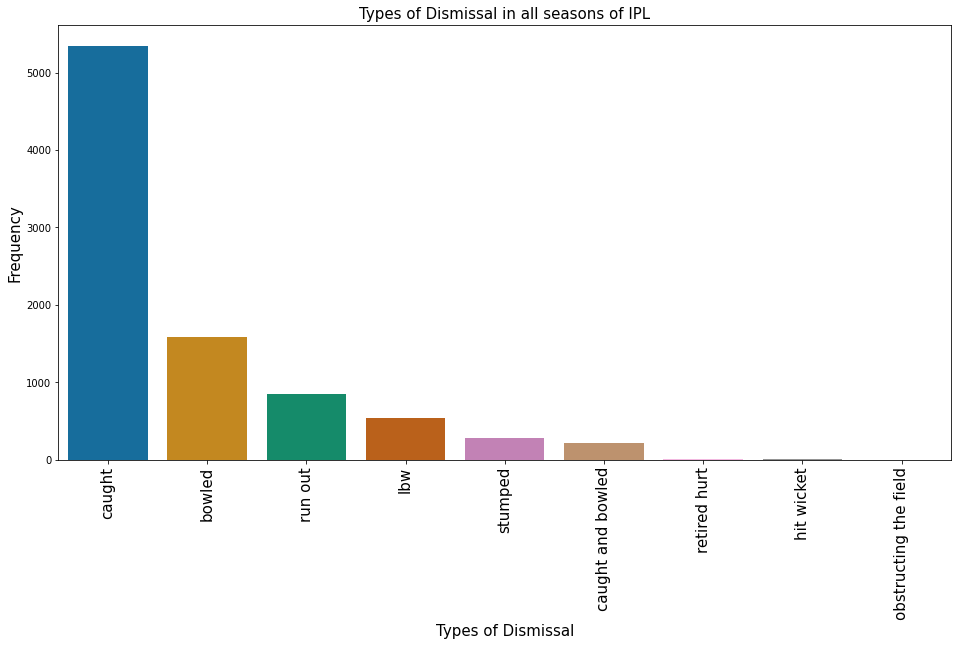

In [25]:
# TYPES OF DISMISSAL IN ALL SEASONS OF IPL
plt.figure(figsize=(16,8))
dismissal_type = deliveries.dismissal_kind.value_counts()
sns.barplot(x = dismissal_type.index, y = dismissal_type,palette="colorblind")
plt.title('Types of Dismissal in all seasons of IPL', fontsize=15)
plt.xlabel('Types of Dismissal', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [26]:
#we will consider batsmen, which played most of the seasons
no_of_balls = pd.DataFrame(df.groupby('batsman')['ball'].count())
runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(df.groupby('batsman')['season'].nunique())

strike_rate = pd.DataFrame({'balls':no_of_balls['ball'], 'run':runs['batsman_runs'], 'season':seasons['season']})
strike_rate.reset_index(inplace = True)
strike_rate['strike_rate'] = (strike_rate['run']/strike_rate['balls'])*100
highest_strike_rate = strike_rate[strike_rate.season.isin([9,10,11])][['season','batsman','strike_rate']].sort_values(by='strike_rate',ascending = False)
highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
188,9,JA Morkel,136.938202
134,9,DR Smith,132.279534
426,9,SE Marsh,130.109775
72,11,BB McCullum,127.332746
38,9,AJ Finch,127.113703
449,10,STR Binny,126.000000


In [27]:
df['umpire3'].unique()

array([nan, 'Anil Chaudhary', 'Nitin Menon', 'S Ravi', 'O Nandan',
       'A Nanda Kishore', 'Vineet Kulkarni', 'C Shamshuddin',
       'Rod Tucker', 'Chris Gaffaney', 'A.D Deshmukh', 'Nigel Llong',
       'K Ananthapadmanabhan', 'Anil Dandekar', 'Virender Kumar Sharma',
       'Yeshwant Barde', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', 'Ulhas Gandhe',
       'Nanda Kishore', 'Ian Gould', 'Sundaram Ravi',
       'KN Ananthapadmanabhan', 'Chettithody Shamshuddin'], dtype=object)

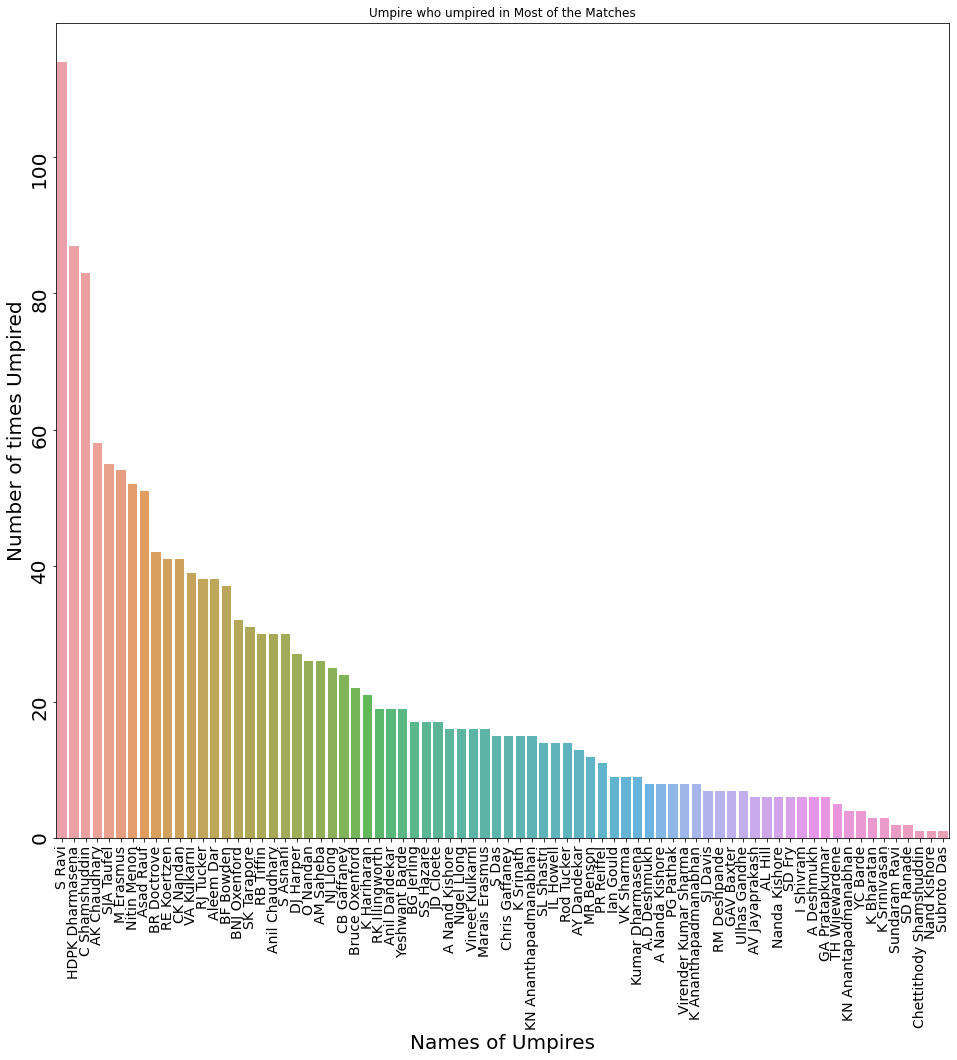

In [28]:
umpires=pd.concat([matches['umpire1'],matches['umpire2'],matches['umpire3']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,15))
most_umpired=sns.barplot(x=umpires.index,y=umpires.values,alpha=0.9)
plt.title("Umpire who umpired in Most of the Matches")
plt.xlabel("Names of Umpires",fontsize=20)
plt.ylabel("Number of times Umpired",fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=90,fontsize=20)
plt.show()

In [29]:
umpires

S Ravi                     114
HDPK Dharmasena             87
C Shamshuddin               83
AK Chaudhary                58
SJA Taufel                  55
                          ... 
Sundaram Ravi                2
SD Ranade                    2
Chettithody Shamshuddin      1
Nand Kishore                 1
Subroto Das                  1
Length: 76, dtype: int64

Text(0, 0.5, 'Strike Rate')

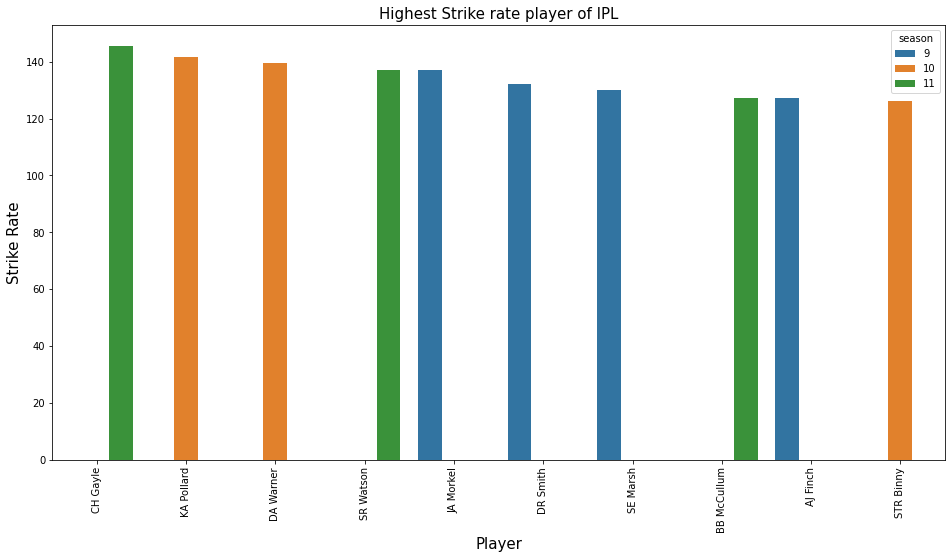

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season')
plt.title('Highest Strike rate player of IPL', fontsize=15)
plt.xlabel('Player', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Strike Rate', fontsize=15)

Text(0, 0.5, 'Total runs')

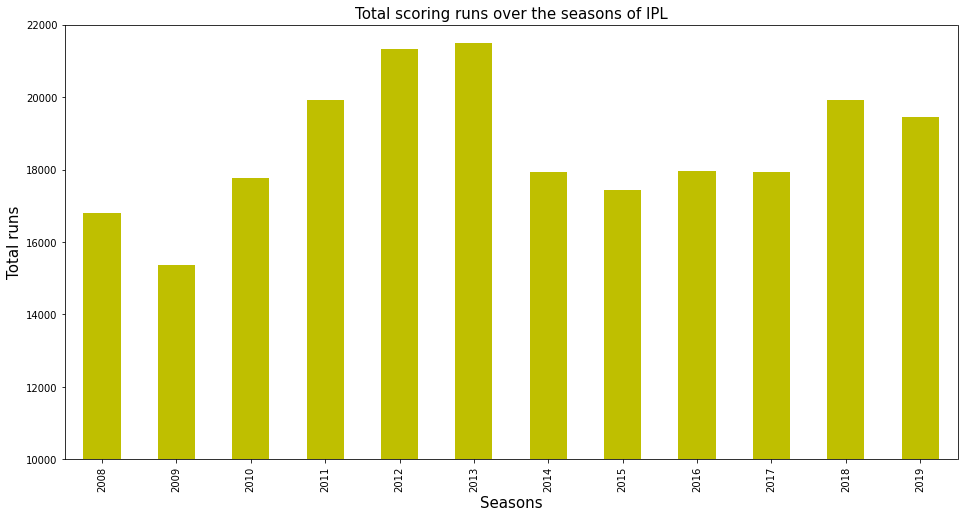

In [31]:
# TOTAL SCORING RUNS OVER SEASON
df.groupby('season')['batsman_runs'].sum().plot(kind='bar',figsize=(16,8), color='y' )
plt.title('Total scoring runs over the seasons of IPL', fontsize=15)
plt.xlabel('Seasons', fontsize=15)
plt.ylim(10000,22000)
plt.ylabel('Total runs', fontsize=15)